# Frequency Analysis and Demo Bode-plot

In this demo notebook some methods used to do frequency analysis is demonstrated.
You need to have SciPy library for Python, already in Anaconda distribution - otherwise install `conda install scipy`.

## 1 Introduction 

Within `signal` package we can create a linear transfer function $H(s)=\frac{1}{0.001s^2+0.03s+2}$. 


In [1]:
import scipy
from scipy import signal
# task 1.1 put correct values of transfer function coefficients (0.001,0.03,2)
s1 = signal.lti([1], [0.001,0.03,2]) 

Now we can compute magnitude and phase part of Bode-plot (https://en.wikipedia.org/wiki/Bode_plot)

In [2]:
import numpy 
# task put range limits - time points from 0 to 60 with step 1 
w=numpy.arange(0,60,1)
w, mag, phase = signal.bode(s1,w=w)

Define normal freqplot and bode-plot using `matplotlib`.

In [3]:
def normalplot(w,mag,phase):
    # plot normal
    import matplotlib.pyplot as plt
    from IPython.core.pylabtools import figsize
    figsize(20,16)
    %matplotlib inline

    plt.subplot(211)
    plt.plot(w, mag)    # Bode magnitude plot
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Freq Resp (Magnitude)")
    plt.grid(True)
    plt.subplot(212)
    plt.plot(w, phase)  # Bode phase plot
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Degrees")
    plt.grid(True)
    plt.show()
    
def bodeplot(w,mag,phase):    
    # plot normal
    import matplotlib.pyplot as plt
    from IPython.core.pylabtools import figsize
    figsize(20,16)
    %matplotlib inline

    plt.subplot(211)
    plt.semilogx(w, mag)    # Bode magnitude plot
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Freq Resp (Magnitude)")
    plt.grid(True)

    plt.subplot(212)
    plt.semilogx(w, phase)  # Bode phase plot
    plt.xlabel("Frequency (rad/s)")
    plt.ylabel("Phase Diff (Degrees)")
    plt.grid(True)

    plt.show()

Now visualize the magnitude and frequency in normal and bode plot

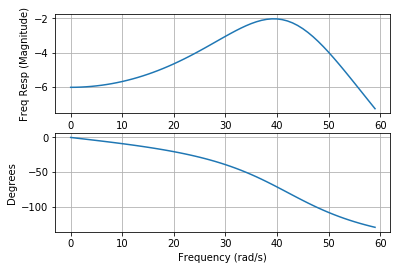

In [4]:
normalplot(w,mag,phase)

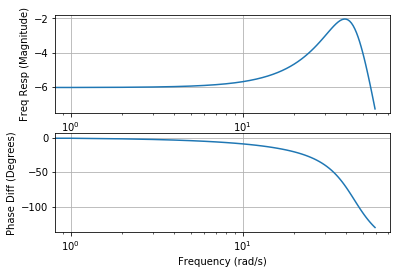

In [5]:
bodeplot(w,mag,phase)

## 2 Read measured data, working with MAT files

We have data from an experiment. The LungVolume is changing more rapidly (frequency of breath is increasing), based on that we see the output signal - heart rate - which corresponds somehow to the change of breath frequency. The data is stored in file "CirculatoryControl.mat".

In order to read `.mat`file, there exist DyMat library for Python for reading and exporting files from this data file. If following cell will fail, install it by `pip install DyMat` in python console and run the cell again. See more at https://www.j-raedler.de/projects/dymat/ 

In [6]:
import DyMat

In [7]:
d = DyMat.DyMatFile("CirculatoryControl.mat")# TASK 2.1 copy the MAT file next to ipynb file and place the filename e.g.'CirculatoryControl.mat'

The 'time' variable is stored next to each model variable as abscissa. In order to get time values related to the variable values call `d.abscissa('variable_name',valuesOnly=True)`

In [8]:
dsize = len(d['LungVolumeChange'])
print(dsize)
print("first 20 elements of 'time' is ")
# show first 20 values
d.abscissa('LungVolumeChange',valuesOnly=True)[:20]

502
first 20 elements of 'time' is 


array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
        6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4],
      dtype=float32)

In [9]:
# normal plot
def plot(x,y,z=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(x,y,'r')
    if z is not None:
        plt.plot(x,z,'b')
    plt.grid(True)    
    plt.show()
    
#plot on semilogarithmic on y axis    
def logplot(x,y,z=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.semilogy(x,y,'r')
    if z is not None:
        plt.semilogy(x,z,'b')
    plt.grid(True)    
    plt.show()


Now plot `LungVolumeChange`:

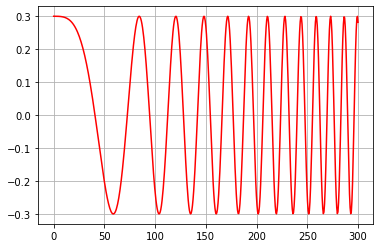

In [10]:
plot(d.abscissa("LungVolumeChange",valuesOnly=True),d["LungVolumeChange"]) # Task 2.2 replace with variable name

Now plot heart rate change.

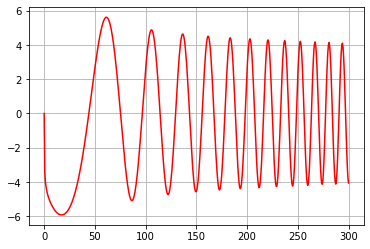

In [11]:
plot(d.abscissa("HR",valuesOnly=True),d["HR"]) # Task 2.3 replace ... with variable containing heart rate change

## 3 Curve fitting

Parameter estimation method - curve fitting repetition.

We create some points arround $f(x)=2.9 \sin(1.5 x)$ and fit a curve to these points, i.e. estimate parameters of curve. 

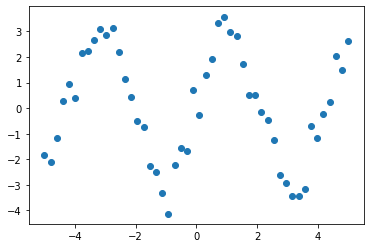

In [13]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + 0.5*np.random.normal(size=50) # task 3.1 replace ... so it computesvalues e.g.:2.9 and 1.5

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

Now fit simple sine over the random points

In [14]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[3, 1])

print(params)

[2.97384249 1.47883401]


Plot fitted curve over the points

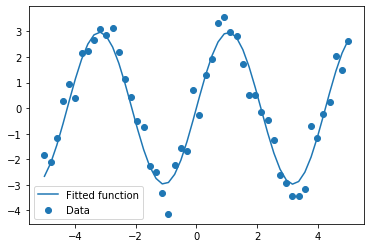

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [ ]:
#Simulate transfer function, implement chirp function $y=\sin(W_s t + \frac{(W_e-W_s)t^2}{2 M})$
#def chirp(Ws,We,A,M,time):
#    return sin(Ws*time+(We-Ws)*t*t/2*M);
#def simulatechirp(x,a,b,c,d):
#    return simulatettf()

## 4 fit measured signal to data

The measured signal is stored in variable `chirpSignal.y` which. We try to identify parameters of transfer function, which based on `chirpSignal.y` generates output corresponding to measured heart rate `HR`.

In [16]:
# define routine to simulate transfer function with params a,b,c,d
import scipy
def simulatettf(a,b,c,d,input,inputtime):
    myttf = scipy.signal.lti([a],[b,c,d])
    res = myttf.output(input,inputtime)
    return res

In [17]:
# simulate transfer function based on input signal (lung volume) and time points from data d
myres = simulatettf(1,0.001,0.03,2,d['chirpSignal.y'],d.abscissa('chirpSignal.y',valuesOnly=True))

/home/vagrant/jupyter/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


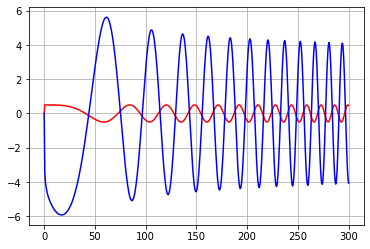

In [24]:
plot(myres[0],myres[1],d['HR'])

In [19]:
# do curve-fit using least_square method - identify parameters of transfer function, and bode plot of the transfer function 

def residuals(c, y, t):
    return y - simulatettf(c[0],c[1],c[2],c[3],d['chirpSignal.y'],t)[1]
x0 = np.array([1, 0.001, 0.03, 2], dtype=float)
x = scipy.optimize.least_squares(residuals, x0, args=(d['HR'], d.abscissa('HR',valuesOnly=True)))

/home/vagrant/jupyter/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [23]:
# see whats inside result x
x.x

array([-9.08690167e+00,  5.02710011e-03,  3.44515965e-02,  1.99077465e+00])

In [21]:
myres2 = simulatettf(x.x[0],x.x[1],x.x[2],x.x[3],d['chirpSignal.y'],d.abscissa('chirpSignal.y',valuesOnly=True))
#myres2 = simulatettf(1,0.005,0.03,2,d['chirpSignal.y'],d.abscissa('chirpSignal.y',valuesOnly=True))

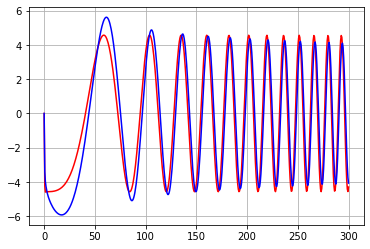

In [22]:
# task, replace ... by variable name 'HR' (between quotes)
# see how the estimated transfer function fits the measured data of heart rate
plot(myres2[0],myres2[1],d['HR'])


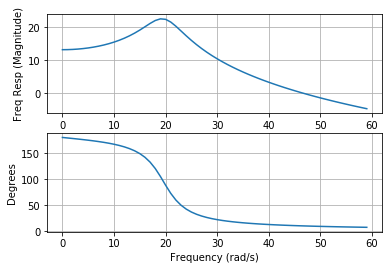

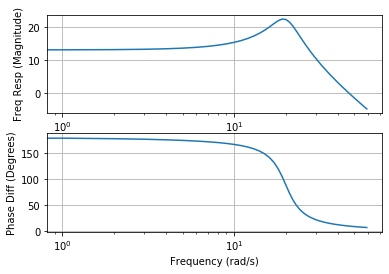

In [25]:
# do normal and bode plot for transfer function
s2 = signal.lti([x.x[0]], [x.x[1],x.x[2],x.x[3]]) 
w, mag, phase = signal.bode(s2,w=w)
normalplot(w,mag,phase)
bodeplot(w,mag,phase)

In [ ]:
# optional - some other methods from scipy to be usefull - spectrogram
#plot(d.abscissa('HR',valuesOnly=True),d['HR'])

In [ ]:
#print (d.abscissa('HR')[0][0],d.abscissa('HR')[0][1])

In [ ]:
#import scipy
#s = scipy.signal.spectrogram(d.abscissa('HR',valuesOnly=True),fs=0.6)

In [ ]:
#s

In [ ]:
#logplot(s[0],s[2])